# Passage extremes

In [1]:
import sys; sys.path.append('../..')
from abslithist import *
from IPython.display import Image
from string import punctuation

In [2]:
moses_detokenize(['The','man','is',"n't",'a','fool','"',',','he','said'])

'The man is n\'t a fool ", he said'

In [3]:
# x=tree(['<b>','"','The','</b>','<span type="hello">man</span>','is',"n't",'a','fool','"',',','he','said'])
# print(x)

In [4]:
def cln(x):
    x=x.strip(punctuation).strip().replace(' "','"').replace('^','')
    while '  ' in x: x=x.replace('  ',' ')
    return x.strip()

In [5]:
dfall=get_current_dfall_psgs()
dfall['nw']=dfall.passage.apply(lambda x: len(x))
dfall['passage']=dfall.passage.apply(cln)
dfall=dfall.query('900<nw<1100')
dfall=dfall[~dfall.value.isna()]
dfall=dfall[~dfall.passage.apply(lambda x: x.count('&ast;')>5)]
# dfall=dfall.sort_values('value')
dfall

,_window,_i,id,passage,value,index,year,title,author,major_genre,canon_genre,nw
1,2587,1033769,markmark.Stein.The_Making_of_Americans.1630,going to be doing some other thing sometime. H...,-1.551326,1552,1925,The Making of Americans,"Stein, Gertrude",Novel,Stein,1003
2,2438,976076,markmark.Stein.The_Making_of_Americans.1630,was not understanding the being in David Hersl...,-1.422741,1552,1925,The Making of Americans,"Stein, Gertrude",Novel,Stein,1001
3,2144,862657,markmark.Stein.The_Making_of_Americans.1630,"can be different in each one, some are believi...",-1.382446,1552,1925,The Making of Americans,"Stein, Gertrude",Novel,Stein,1000
4,450,190265,Plato.Dialogues,likely to hear the truth about it from you. Th...,-1.371544,1318,-375,Dialogues,Plato,Dialogue,Socratic dialogues,1016
5,134,50566,Johnson.Rambler.Vol1,they will not allow them in any other case. Th...,-1.366983,1399,1750,The Rambler,Samuel Johnson,,,997
...,...,...,...,...,...,...,...,...,...,...,...,...
1084213,850,343210,markmark.Le Guin.Always_Coming_Home.1551,"by cornbreads, either of the hoe-cake or the t...",1.349990,1069,1985,Always Coming Home,"Le Guin, Ursula K.",,,1012
1084216,882,347649,chadwyck.Scott.Kenilworth_in_the_Waverle.1316,"of wallnut &hyphen;tree, toppe fashion, the pi...",1.478788,1419,1831,"Kenilworth [in, the Waverley Novels]","Scott, Walter, Sir, 1771-1832",Novel,Historical nov.,1031
1084217,890,350720,chadwyck.Scott.Kenilworth_in_the_Waverle.1316,"single vallance of crimson sattin,\npaned with...",1.510687,1419,1831,"Kenilworth [in, the Waverley Novels]","Scott, Walter, Sir, 1771-1832",Novel,Historical nov.,1003
1084218,1630,625075,Rabelais.Gargantua and Pantagruel,nPan. What sort of porridge? Fri. None.\nPan. ...,1.574750,1333,1534,Gargantua and Pantagruel,Rabelais,Other,Rabelais,932


In [6]:

def compare_extremes(dfall,corpus_name='CanonFiction',topn=100,width=500,monospace=True):
#     dfall=dfall.sort_values(['id','_i'])
    C=lltk.load(corpus_name)
    most_conc = dfall.sort_values('value',ascending=False).head(topn)
#     most_abs = dfall[dfall.title!='The Making of Americans'].sort_values('value',ascending=True).head(topn)
    most_abs = dfall.sort_values('value',ascending=True).head(topn)
    
    for i_conc,(index_conc,row_conc) in enumerate(tqdm(list(most_conc.iterrows()))):
        idx_conc=row_conc.id
        t_conc=C.textd[idx_conc]

        i_abs=i_conc
        row_abs=most_abs.iloc[i_abs]
        idx_abs=row_abs.id
        t_abs=C.textd[idx_abs]
        
        fn=compare_psgs(
            (row_abs.passage, row_conc.passage),
            (t_abs, t_conc),
            #(f'Num. {i_abs+1} most abstract passage',f'Num. {i_conc+1} most concrete passage'),
            ('',''),
            show=False,
            ofn=os.path.join(PATH_FIGS,'extremes','v1',f'extreme-{i_conc}.png'),
            monospace=monospace,
#             incl_distro=False
        )
        display(Image(filename=fn))
#         print(fn)
#         break

In [7]:
dfq=dfall.iloc[0:1].append(
    dfall.iloc[1:].query('title!="The Making of Americans"')
)

  0%|          | 0/50 [00:00<?, ?it/s]

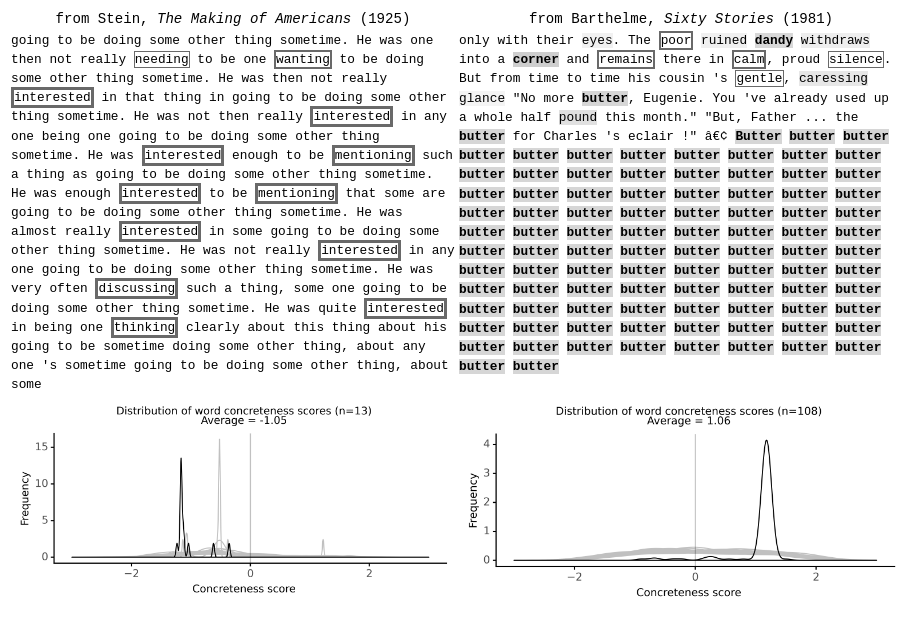

  2%|▏         | 1/50 [00:09<07:57,  9.74s/it]

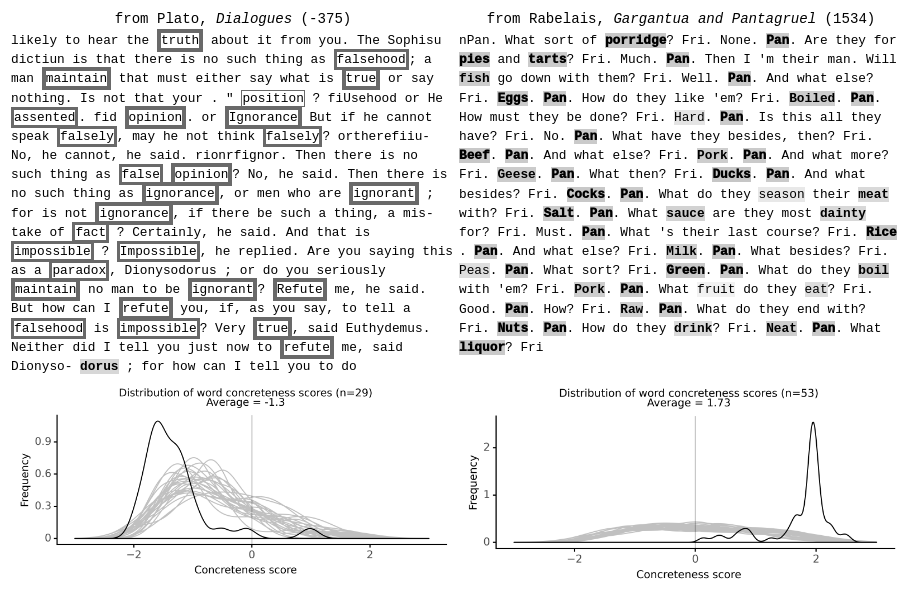

  4%|▍         | 2/50 [00:18<07:28,  9.34s/it]

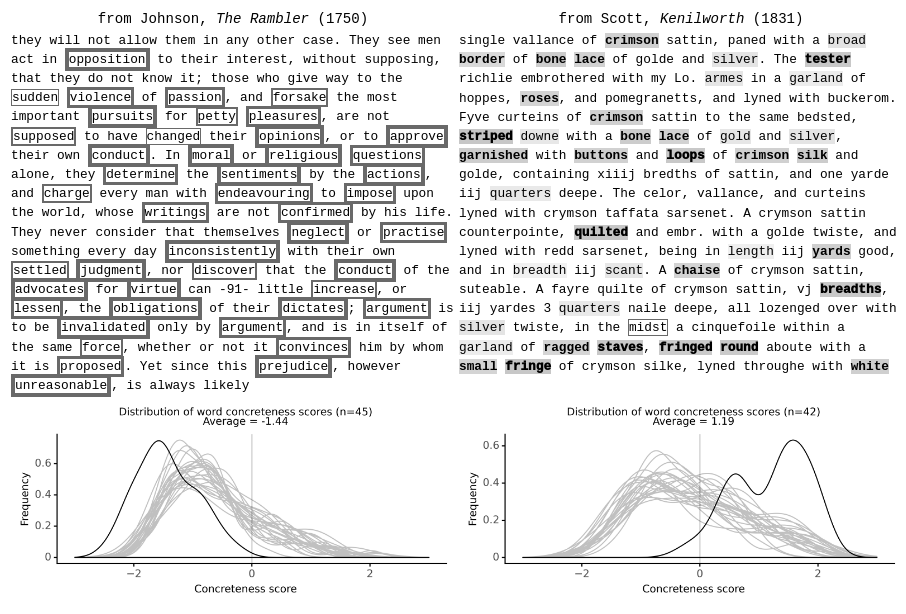

  6%|▌         | 3/50 [00:25<06:48,  8.70s/it]

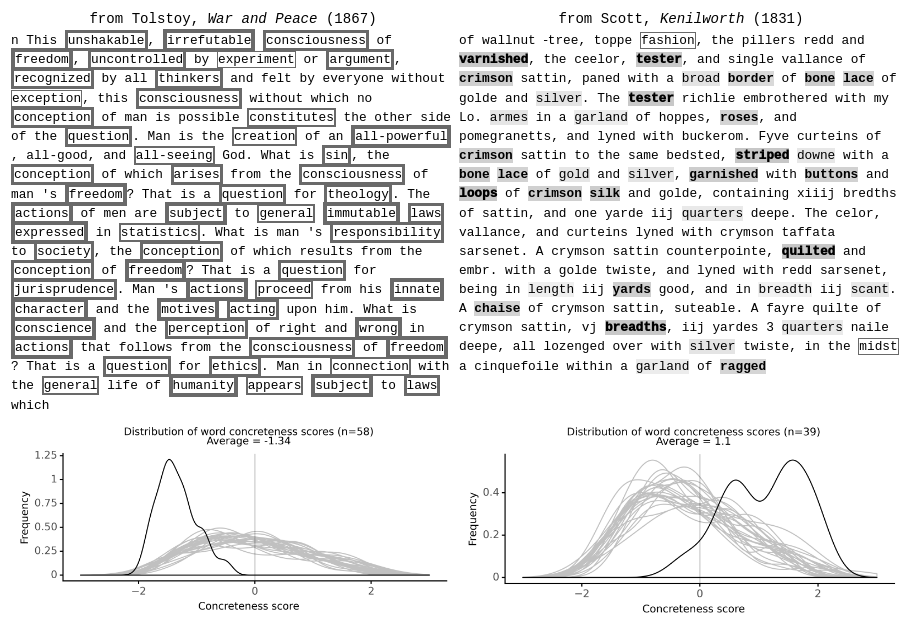

  8%|▊         | 4/50 [00:35<06:55,  9.04s/it]

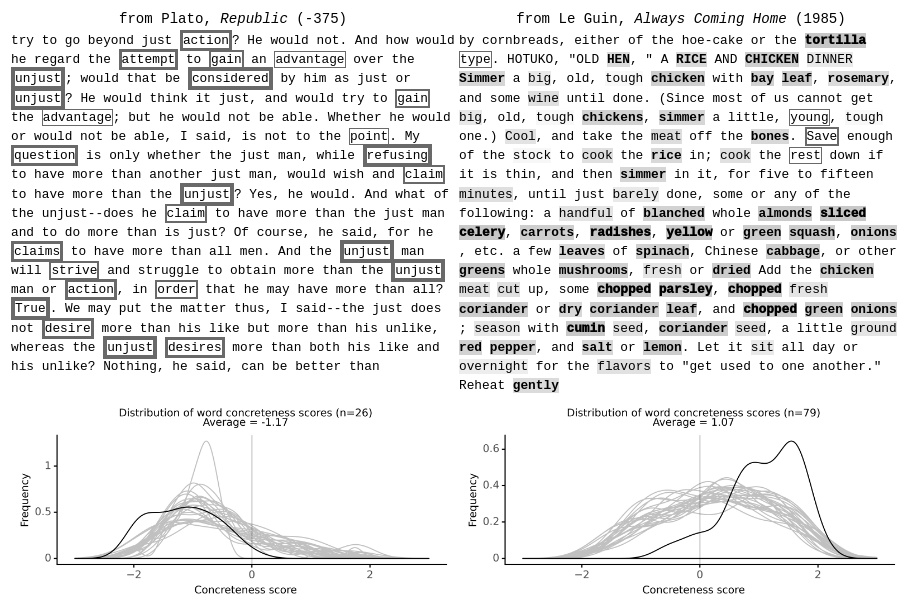

 10%|█         | 5/50 [00:42<06:23,  8.52s/it]

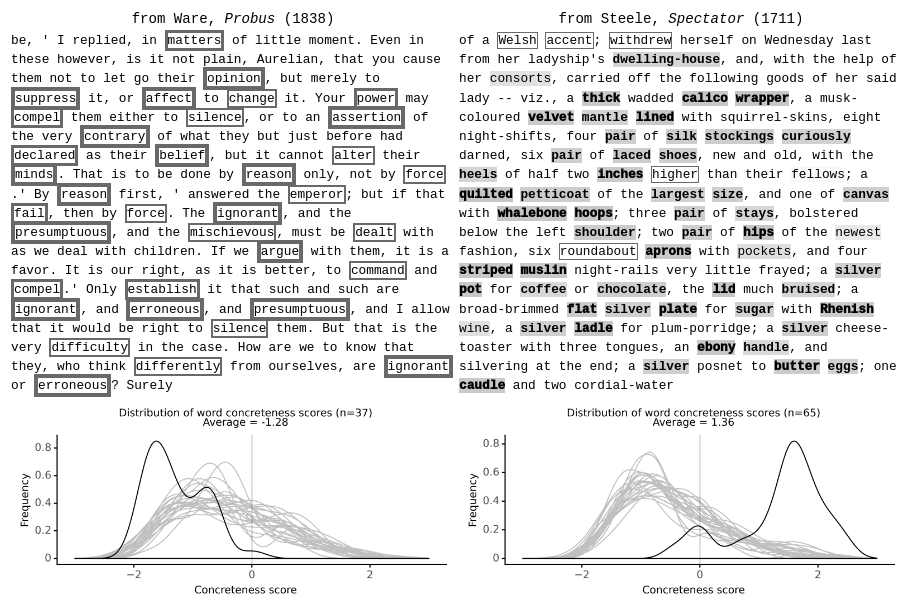

 14%|█▍        | 7/50 [00:59<06:09,  8.60s/it]

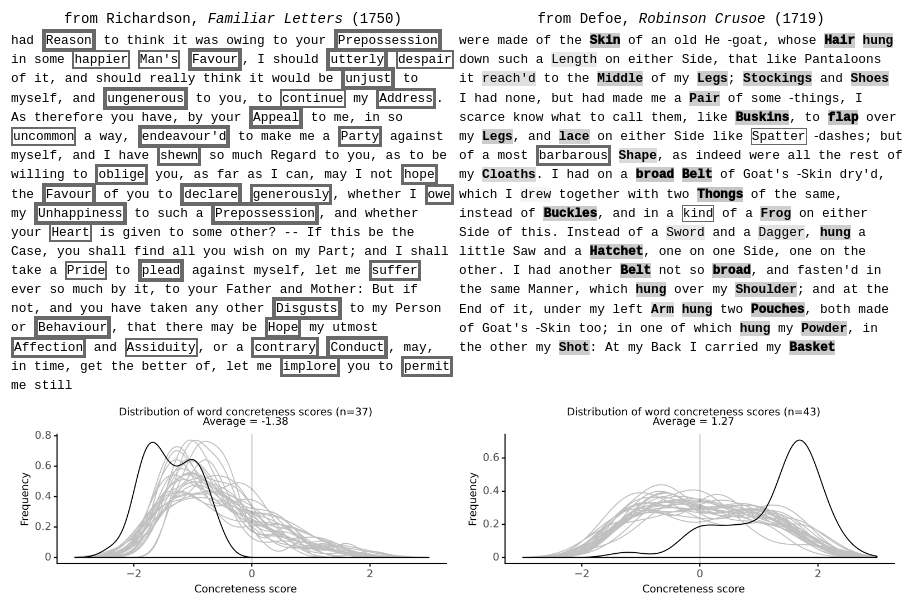

 16%|█▌        | 8/50 [01:06<05:37,  8.04s/it]

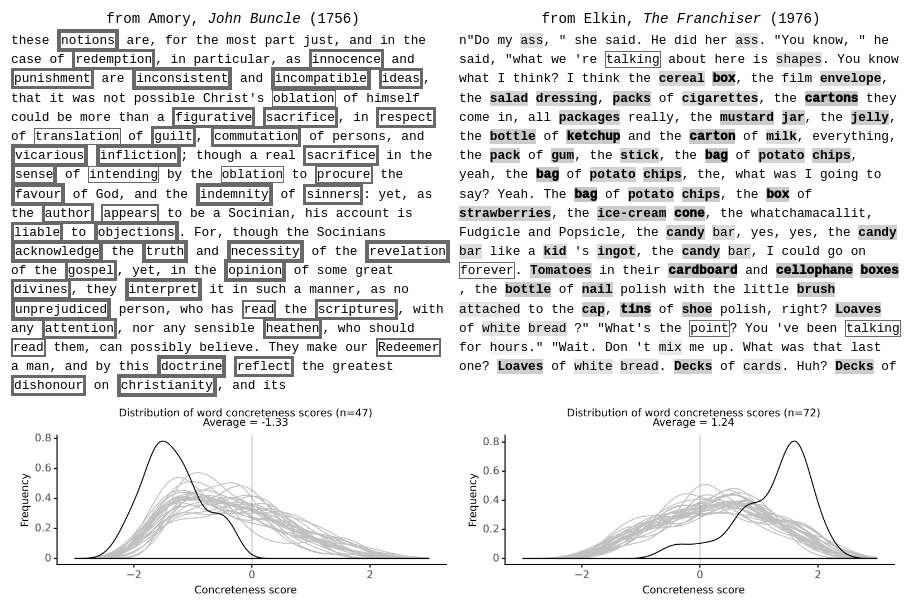

 18%|█▊        | 9/50 [01:14<05:28,  8.01s/it]

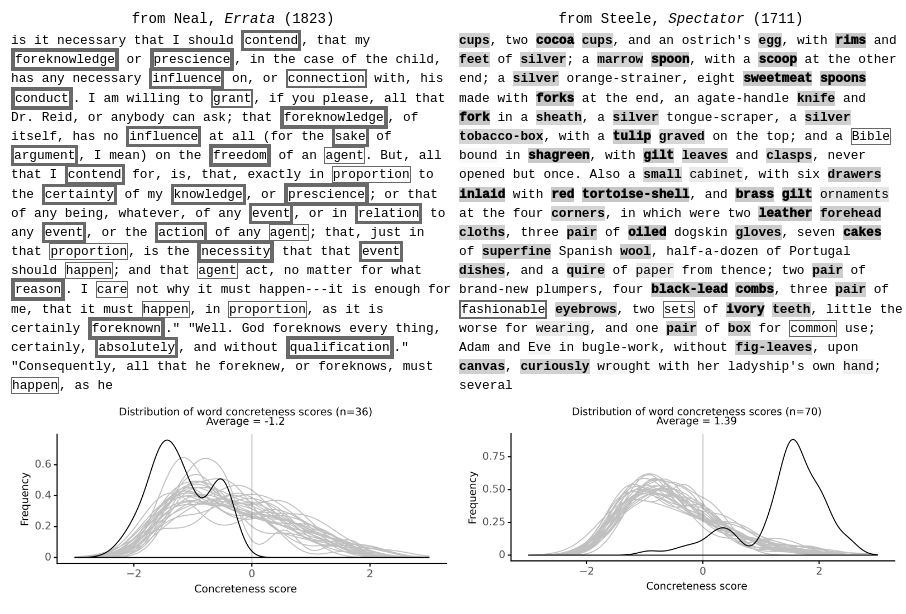

 20%|██        | 10/50 [01:23<05:33,  8.34s/it]

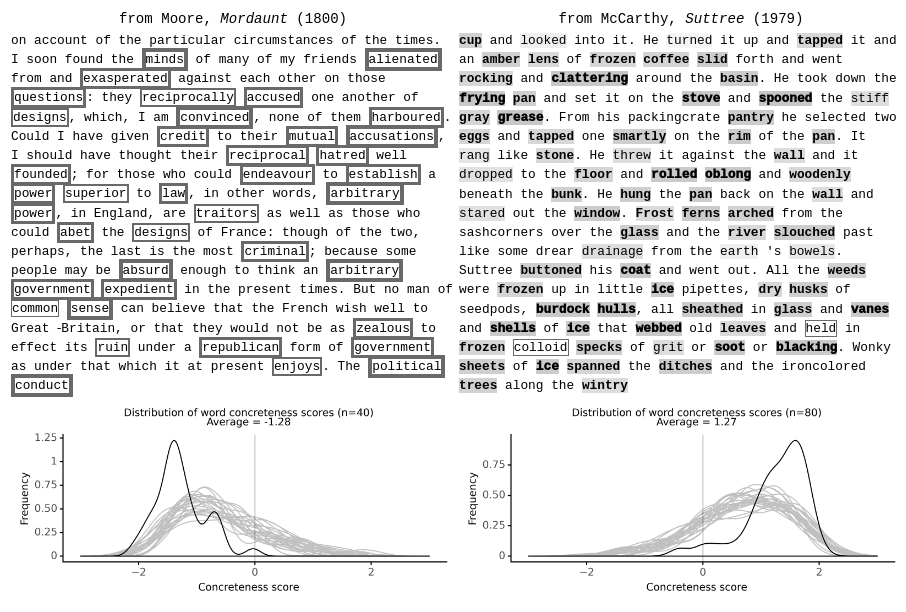

 22%|██▏       | 11/50 [01:31<05:19,  8.19s/it]

In [ ]:
compare_extremes(
    dfq,
    monospace=True,
    topn=50
)